<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#mu/sd-for-z-score-transformation" data-toc-modified-id="mu/sd-for-z-score-transformation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>mu/sd for z-score transformation</a></span></li></ul></li><li><span><a href="#Train/Test-split" data-toc-modified-id="Train/Test-split-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Train/Test split</a></span></li><li><span><a href="#Writing" data-toc-modified-id="Writing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Writing</a></span><ul class="toc-item"><li><span><a href="#Train/test" data-toc-modified-id="Train/test-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Train/test</a></span></li></ul></li><li><span><a href="#hyperparameter-search" data-toc-modified-id="hyperparameter-search-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>hyperparameter search</a></span><ul class="toc-item"><li><span><a href="#genome_phy" data-toc-modified-id="genome_phy-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>genome_phy</a></span><ul class="toc-item"><li><span><a href="#Config" data-toc-modified-id="Config-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Config</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-7.1.2"><span class="toc-item-num">7.1.2&nbsp;&nbsp;</span>Run</a></span></li></ul></li><li><span><a href="#no_phy" data-toc-modified-id="no_phy-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>no_phy</a></span><ul class="toc-item"><li><span><a href="#Config" data-toc-modified-id="Config-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Config</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-7.2.2"><span class="toc-item-num">7.2.2&nbsp;&nbsp;</span>Run</a></span></li></ul></li><li><span><a href="#random_phy" data-toc-modified-id="random_phy-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>random_phy</a></span><ul class="toc-item"><li><span><a href="#Config" data-toc-modified-id="Config-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>Config</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-7.3.2"><span class="toc-item-num">7.3.2&nbsp;&nbsp;</span>Run</a></span></li></ul></li></ul></li><li><span><a href="#Summary-of-all" data-toc-modified-id="Summary-of-all-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Summary of all</a></span></li><li><span><a href="#TADA-data-augmentation" data-toc-modified-id="TADA-data-augmentation-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>TADA data augmentation</a></span></li></ul></div>

# Goal

* dataset generation for treeSparse algorithm
* target: regression

# Var

In [115]:
# working dir
work_dir = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/ML/'

# bracken counts
brk_file = '/ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/diversity/bracken_filt.qs'

# metadata
## filtered
metadata_filt_file = file.path(work_dir, 'CurMetDat_metadata_filt-n1846.tsv')
## all 
base_in_dir = '/ebio/abt3_projects/small_projects/nyoungblut/public_data_retireval/'
metadata_file = file.path(base_in_dir, 'CurMetDat-metagenomes', 'files', 'metadata', 'Filtered_CurMetDat_f.tsv')

# trees
## GTDB genome phylogeny
phy_file = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/phylogeny/ar122-bac120_r89_1per-GTDB-Spec_gte50comp-lt5cont_rn.nwk'
## Trait 
phy_trt_file = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/phenotype/predictions_flat_majority-votes_combined_jaccard_rn.nwk'
## COG content
phy_cog_file = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/phenotype/genes-per-COG_bray.nwk'
phy_cogcat_file = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/phenotype/genes-per-COGcat_bray.nwk'
## pfam content
phy_pfam_file = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/phenotype/genes-per-pfam_bray.nwk'
phy_pfamcat_file = '/ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/genomes/LLG/phenotype/genes-per-pfamGrp_bray.nwk'

# params
threads = 8

# Init

In [116]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(ape)
library(LeyLabRMisc)

In [117]:
make_dir(work_dir)
setDTthreads(threads)
df.dims()

Directory already exists: /ebio/abt3_projects/databases_no-backup/curatedMetagenomicData/global_metagenomes/ML/ 


# Load

In [118]:
# all 
meta = fread(metadata_file, sep='\t', check.names=TRUE) %>%
    mutate.(Sample = gsub('-', '.', Sample)) %>%
    filter.(number_reads >= 5e5) %>%
    select.(Sample, dataset_name, subjectID, study_condition, 
            disease, age, gender, BMI, westernized) %>%
    filter.(!is.na(age))

meta %>% unique_n('Samples', Sample)
meta

No. of unique Samples: 2094 


Sample,dataset_name,subjectID,study_condition,disease,age,gender,BMI,westernized
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<lgl>
TRAVELRES1,Bengtsson-PalmeJ_2015,TRAVELRES1_2,control,healthy,25,female,NA,TRUE
TRAVELRES10,Bengtsson-PalmeJ_2015,TRAVELRES9_10,control,healthy,34,female,NA,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
CCIS82944710ST.20.0,ZellerG_2014,FR-730,control,healthy,38,female,22,TRUE
CCIS93040568ST.20.0,ZellerG_2014,FR-682,control,healthy,65,male,30,TRUE


In [119]:
# Bracken count table
brk = qs::qread(brk_file, nthreads=threads) %>%
    mutate.(name = gsub(' ', '_', name)) %>%
    filter.(Sample %in% meta$Sample)
brk %>% unique_n('Species', name)
brk %>% unique_n('Samples', Sample)
brk 

No. of unique Species: 3195 
No. of unique Samples: 1929 


dataset,name,taxonomy_id,taxonomy_lvl,Domain,Phylum,Class,Order,Family,Genus,Species,Sample,Abundance
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
CosteaPI_2017,s__Caecibacter_massiliensis,108259,S,Bacteria,Firmicutes_C,Negativicutes,Veillonellales,Megasphaeraceae,Caecibacter,Caecibacter massiliensis,SID713A004.11.0.0,0
CosteaPI_2017,s__UBA1777_sp002350825,178550,S,Bacteria,Firmicutes_A,Clostridia,Oscillospirales,Oscillospiraceae,UBA1777,UBA1777 sp002350825,SID713A004.11.0.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
XieH_2016,s__Nitrosoglobus_terrae,180746,S,Bacteria,Proteobacteria,Gammaproteobacteria,Nitrosococcales,Nitrosococcaceae,Nitrosoglobus,Nitrosoglobus terrae,YSZC12003_37880,0
XieH_2016,s__Phoenicibacter_massiliensis,180197,S,Bacteria,Actinobacteriota,Coriobacteriia,Coriobacteriales,Eggerthellaceae,Phoenicibacter,Phoenicibacter massiliensis,YSZC12003_37880,0


In [120]:
# abundance filtering
min_abund = 0.0005
#min_abund = 0.000001
brk = brk %>%
    mutate.(mean_abund = mean(Abundance), by=c(name)) %>%
    filter.(mean_abund > min_abund) %>%
    mutate.(n_taxa = sum(Abundance > 0), by=c(Sample)) %>%
    filter.(n_taxa > 0) %>%
    select.(-mean_abund, -n_taxa)
brk %>% unique_n('Species', name)
brk %>% unique_n('Samples', Sample)
brk

No. of unique Species: 306 
No. of unique Samples: 1929 


dataset,name,taxonomy_id,taxonomy_lvl,Domain,Phylum,Class,Order,Family,Genus,Species,Sample,Abundance
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
CosteaPI_2017,s__Eubacterium_G_ventriosum,141784,S,Bacteria,Firmicutes_A,Clostridia,Lachnospirales,Lachnospiraceae,Eubacterium_G,Eubacterium_G ventriosum,SID713A004.11.0.0,0.00028
CosteaPI_2017,s__Prevotella_sp000436035,150829,S,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Prevotella,Prevotella sp000436035,SID713A004.11.0.0,0.00305
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
XieH_2016,s__Phascolarctobacterium_faecium,130319,S,Bacteria,Firmicutes_C,Negativicutes,Acidaminococcales,Acidaminococcaceae,Phascolarctobacterium,Phascolarctobacterium faecium,YSZC12003_37880,0.00000
XieH_2016,s__Bacteroides_B_dorei,105537,S,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides_B,Bacteroides_B dorei,YSZC12003_37880,0.01331


In [121]:
# abundances to wide table
m = brk %>%
    select.(name, Sample, Abundance) %>%
    pivot_wider.(name, Abundance) %>%
    as.data.frame 
rownames(m) = m[,1]
m[,1] = NULL
m = m %>% apply(2, function(x) ifelse(is.na(x), 0, x)) %>%
        as.data.frame
m

,s__Acetatifactor_sp900066365,s__Acetatifactor_sp900066565,s__Adlercreutzia_equolifaciens,s__Agathobacter_faecis,s__Agathobacter_rectale,s__Agathobacter_sp000434275,s__Agathobacter_sp002474415,s__Agathobacter_sp900317585,s__Agathobaculum_butyriciproducens,s__Akkermansia_muciniphila,⋯,s__Sutterella_wadsworthensis_A,s__Sutterella_wadsworthensis_B,s__TF01-11_sp001414325,s__Tidjanibacter_inops,s__Treponema_D_succinifaciens,s__Tyzzerella_nexilis,s__UBA11524_sp000437595,s__UBA738_sp002404605,s__Zag111_sp002103105,s__Zag111_sp003258735
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A11_01_1FE,0.00000,0.00000,0,0.00021,0.00034,0,0.00000,0.00000,0.00064,0,⋯,0,0,0.00000,0,0,0.00036,0,0,0,0
A13_01_1FE,0.00341,0.00133,0,0.01091,0.00214,0,0.00093,0.00082,0.00041,0,⋯,0,0,0.00091,0,0,0.00000,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
YSZC12003_37879,0.00284,0.00089,0.00043,0.00060,0.00776,0.00000,0,0.00239,0.00024,0.00000,⋯,0,0,0,0,0,0.00000,0,0,0,0
YSZC12003_37880,0.00068,0.00411,0.00131,0.00134,0.01028,0.00117,0,0.00365,0.00093,0.00281,⋯,0,0,0,0,0,0.02576,0,0,0,0


In [122]:
# metadata filtered
meta_f = meta %>%
    filter.(Sample %in% rownames(m)) %>%
    as.data.frame
rownames(meta_f) = meta_f$Sample
meta_f %>% unique_n('Samples', Sample)
meta_f

No. of unique Samples: 1929 


,Sample,dataset_name,subjectID,study_condition,disease,age,gender,BMI,westernized
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<lgl>
TRAVELRES1,TRAVELRES1,Bengtsson-PalmeJ_2015,TRAVELRES1_2,control,healthy,25,female,NA,TRUE
TRAVELRES10,TRAVELRES10,Bengtsson-PalmeJ_2015,TRAVELRES9_10,control,healthy,34,female,NA,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
YEZ_N.38,YEZ_N.38,YeZ_2018,YEZ_N-38,control,healthy,38,female,19.7,TRUE
YEZ_N.37,YEZ_N.37,YeZ_2018,YEZ_N-37,control,healthy,46,male,29.7,TRUE


In [123]:
# Genome phylogeny
phy = read.tree(phy_file)
to_rm = setdiff(phy$tip.label, colnames(m))
phy = ape::drop.tip(phy, to_rm)
phy


Phylogenetic tree with 306 tips and 305 internal nodes.

Tip labels:
	s__Methanobrevibacter_A_smithii, s__Methanobrevibacter_A_smithii_A, s__Ruminococcus_E_bromii_B, s__Ruminococcus_E_bromii, s__Ruminococcus_E_sp900314705, s__GCA-900066995_sp900291955, ...
Node labels:
	100.0, 100.0, 1.0, 0.0, 0.0, 3.0, ...

Rooted; includes branch lengths.

In [124]:
# random phylogney
phy_rand = ape::rtree(length(phy$tip.label), tip.label = phy$tip.label)
phy_rand


Phylogenetic tree with 306 tips and 305 internal nodes.

Tip labels:
	s__Prevotella_lascolaii, s__Fusobacterium_A_mortiferum, s__Prevotella_sp002439605, s__Eubacterium_I_ramulus_A, s__Methanobrevibacter_A_smithii_A, s__CAG-1427_sp000436075, ...

Rooted; includes branch lengths.

## mu/sd for z-score transformation

In [125]:
brk %>% 
    summarize.(mu = mean(Abundance),
               sd = sd(Abundance))

mu,sd
<dbl>,<dbl>
0.003046298,0.0134066


# Train/Test split

In [126]:
train_frac = 0.8
n_train = round(nrow(meta_f) * train_frac,0)
meta_f_train = meta_f[sample(meta_f$Sample, n_train),]
meta_f_test = meta_f[setdiff(meta_f$Sample, meta_f_train$Sample),]
meta_f_train %>% nrow %>% cat('No. of training samples:', ., '\n')
meta_f_test %>% nrow %>% cat('No. of test samples:', ., '\n')

No. of training samples: 1543 
No. of test samples: 386 


In [127]:
# summary
meta_f_train$age %>% summary
meta_f_test$age %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.00   26.00   41.00   43.82   61.00  107.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.00   25.00   37.50   43.06   62.00   79.00 

In [128]:
# parsing abunds
m_train = m[meta_f_train$Sample,]
m_test = m[meta_f_test$Sample,]
m_train %>% nrow %>% cat('No. of training samples:', ., '\n')
m_test %>% nrow %>% cat('No. of test samples:', ., '\n')

No. of training samples: 1543 
No. of test samples: 386 


# Writing

In [129]:
outdir = '/ebio/abt3_projects/software/dev/treeSparse/tests/data/globalMG/age/'
make_dir(outdir)

Directory already exists: /ebio/abt3_projects/software/dev/treeSparse/tests/data/globalMG/age/ 


In [130]:
outF = file.path(outdir, 'genome_phy.nwk')
write.tree(phy, outF)
cat('File written:', outF, '\n')

File written: /ebio/abt3_projects/software/dev/treeSparse/tests/data/globalMG/age//genome_phy.nwk 


In [131]:
outF = file.path(outdir, 'random_phy.nwk')
write.tree(phy_rand, outF)
cat('File written:', outF, '\n')

File written: /ebio/abt3_projects/software/dev/treeSparse/tests/data/globalMG/age//random_phy.nwk 


## Train/test

In [132]:
outF = file.path(outdir, 'abund_train.tsv')
write_table(m_train, outF, row.names=TRUE)

File written: /ebio/abt3_projects/software/dev/treeSparse/tests/data/globalMG/age//abund_train.tsv 


In [133]:
outF = file.path(outdir, 'abund_test.tsv')
write_table(m_test, outF, row.names=TRUE)

File written: /ebio/abt3_projects/software/dev/treeSparse/tests/data/globalMG/age//abund_test.tsv 


In [134]:
outF = file.path(outdir, 'targets_train.tsv')
write_table(meta_f_train, outF, row.names=TRUE)

File written: /ebio/abt3_projects/software/dev/treeSparse/tests/data/globalMG/age//targets_train.tsv 


In [135]:
outF = file.path(outdir, 'targets_test.tsv')
write_table(meta_f_test, outF, row.names=TRUE)

File written: /ebio/abt3_projects/software/dev/treeSparse/tests/data/globalMG/age//targets_test.tsv 


# hyperparameter search

In [136]:
D = '/ebio/abt3_projects/software/dev/treeSparse/'

## genome_phy

### Config

In [84]:
F = file.path(D, 'hyperparam_search/age/genome_phy/config.yaml')
cat_file(F)

#-- I/O --#
input_files:
  train:
    x: tests/data/globalMG/westernized/abund_train.tsv
    y: tests/data/globalMG/westernized/targets_train.tsv
  test:
    x: tests/data/globalMG/westernized/abund_test.tsv
    y: tests/data/globalMG/westernized/targets_test.tsv
  tree: tests/data/globalMG/westernized/genome_phy.nwk

# output location
output_dir: hyperparam_search/westernized/genome_phy/

# temporary file directory (your username will be added automatically)
tmp_dir: /ebio/abt3_scratch/

#-- set params and search params --#
set_params: --mu 0.003021272 --sigma 0.01375474 --epochs 200
search_params:
  batches:
    - 50
    - 100
  distances:
    - 0.1
    - 0.1 0.3
    - 0.1 0.5
  linear_layers:
    - 500
    - 100
    - 10
    - 500 100
    - 500 20
  dropout:
    sparse:
      - 0
      - 0.5
    linear:
      - 0
      - 0.5
  learning_rate:
    - 0.001
    - 0.0001

#-- snakemake pipeline --#
pipeline:
  snakemake_folder: ./
  script_folder: bin/scripts/
  seed: 83471
  name: treeS

### Run

```
(snakemake) @ rick:/ebio/abt3_projects/software/dev/treeSparse
$ screen -L -S treeSparse-genomePhy snakemake --use-conda -j 24 --configfile hyperparam_search/westernized/genome_phy/config.yaml -F
```

## no_phy

* Using fully connected linear layers

### Config

In [87]:
F = file.path(D, 'hyperparam_search/westernized/no_phy/config.yaml')
cat_file(F)

#-- I/O --#
input_files:
  train:
    x: tests/data/globalMG/westernized/abund_train.tsv
    y: tests/data/globalMG/westernized/targets_train.tsv
  test:
    x: tests/data/globalMG/westernized/abund_test.tsv
    y: tests/data/globalMG/westernized/targets_test.tsv
  tree: tests/data/globalMG/westernized/genome_phy.nwk

# output location
output_dir: hyperparam_search/westernized/no_phy/

# temporary file directory (your username will be added automatically)
tmp_dir: /ebio/abt3_scratch/

#-- set params and search params --#
set_params: --mu 0.003021272 --sigma 0.01375474 --epochs 200 --all-linear
search_params:
  batches:
    - 50
    - 100
    - 200
  distances:
    - 0.05
    - 0.1
    - 0.2
    - 0.5
    - 0.8
    - 0.1 0.3
    - 0.1 0.5
  linear_layers:
    - 500
    - 100
    - 10
    - 500 100
    - 500 20
    - 200 20
  dropout:
    sparse:
      - 0
      - 0.1
      - 0.25
      - 0.5
    linear:
      - 0
      - 0.1
      - 0.25
      - 0.5
  learning_rate:
    - 0.001
    - 0.

### Run

```
(snakemake) @ rick:/ebio/abt3_projects/software/dev/treeSparse
$ screen -L -S treeSparse-genomePhy snakemake --use-conda -j 24 --configfile hyperparam_search/westernized/no_phy/config.yaml -F
```

## random_phy

* Randomly generated phylogeny instead of genome-phylogeny

### Config

In [101]:
F = file.path(D, 'hyperparam_search/westernized/random_phy/config.yaml')
cat_file(F)

#-- I/O --#
input_files:
  train:
    x: tests/data/globalMG/westernized/abund_train.tsv
    y: tests/data/globalMG/westernized/targets_train.tsv
  test:
    x: tests/data/globalMG/westernized/abund_test.tsv
    y: tests/data/globalMG/westernized/targets_test.tsv
  tree: tests/data/globalMG/westernized/random_phy.nwk

# output location
output_dir: hyperparam_search/westernized/random_phy/

# temporary file directory (your username will be added automatically)
tmp_dir: /ebio/abt3_scratch/

#-- set params and search params --#
set_params: --mu 0.003021272 --sigma 0.01375474 --epochs 200
search_params:
  batches:
    - 50
    - 100
    - 200
  distances:
    - 0.05
    - 0.1
    - 0.2
    - 0.5
    - 0.8
    - 0.1 0.3
    - 0.1 0.5
  linear_layers:
    - 500
    - 100
    - 10
    - 500 100
    - 500 20
    - 200 20
  dropout:
    sparse:
      - 0
      - 0.1
      - 0.25
      - 0.5
    linear:
      - 0
      - 0.1
      - 0.25
      - 0.5
  learning_rate:
    - 0.001
    - 0.0001

#--

### Run

```
(snakemake) @ rick:/ebio/abt3_projects/software/dev/treeSparse
$ screen -L -S treeSparse-genomePhy snakemake --use-conda -j 24 --configfile hyperparam_search/westernized/random_phy/config.yaml -F
```

# Summary of all

In [151]:
F = c('hyperparam_search/age/genome_phy/training_logs/train_log.tsv',
      'hyperparam_search/age/no_phy/training_logs/train_log.tsv',
      'hyperparam_search/age/random_phy/training_logs/train_log.tsv')

read_file = function(x){
    dt = Fread(x)
    dt$dataset = gsub('.+age/([^/]+)/.+', '\\1', x)
    return(dt)
}

train_log = F %>%
    lapply(function(x) file.path(D, x)) %>%
    lapply(read_file) %>%
    data.table::rbindlist(use.names = TRUE)
train_log

batches,distances,linear_layers,dropout_sparse,dropout_linear,learning_rate,epoch,train_loss,test_loss,dataset
<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>
50,0.05,500,0,0,0.001,1,0.5005908,0.3991346,genome_phy
50,0.05,500,0,0,0.001,2,0.3193945,0.2566391,genome_phy
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
200,0.1-0.5,200-20,0.5,0.5,1e-04,30,0.5404865,0.5395838,random_phy
200,0.1-0.5,200-20,0.5,0.5,1e-04,31,0.5434792,0.5420252,random_phy


In [152]:
# param settings that achieve the lowest test-loss
df.dims(15)
train_log_s = train_log %>%
    mutate.(min_test_loss = min(test_loss),
               by=c(dataset, batches, distances, linear_layers, dropout_sparse,
                    dropout_linear, learning_rate)) %>%
    filter.(test_loss == min_test_loss)
train_log_s %>%
    arrange.(min_test_loss) %>%
    slice_head.(n=15)
df.dims()

batches,distances,linear_layers,dropout_sparse,dropout_linear,learning_rate,epoch,train_loss,test_loss,dataset,min_test_loss
<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<dbl>
200,0.1-0.3,500-20,0,0.00,0.001,37,0.004048111,0.001188033,no_phy,0.001188033
200,0.1-0.5,200-20,0,0.00,0.001,37,0.002080558,0.001304657,no_phy,0.001304657
50,0.8,200-20,0,0.00,0.001,37,0.002261796,0.001412634,no_phy,0.001412634
50,0.1,500,0,0.00,0.001,38,0.002782345,0.001440669,no_phy,0.001440669
50,0.5,200-20,0,0.00,0.001,52,0.002720293,0.001722699,random_phy,0.001722699
100,0.8,200-20,0,0.00,0.001,39,0.007222715,0.001919330,no_phy,0.001919330
200,0.1,500-20,0,0.10,0.001,36,0.003135795,0.001989831,no_phy,0.001989831
200,0.8,200-20,0,0.00,0.001,43,0.005624828,0.002051600,no_phy,0.002051600
200,0.05,200-20,0,0.25,0.001,38,0.003219268,0.002130172,no_phy,0.002130172


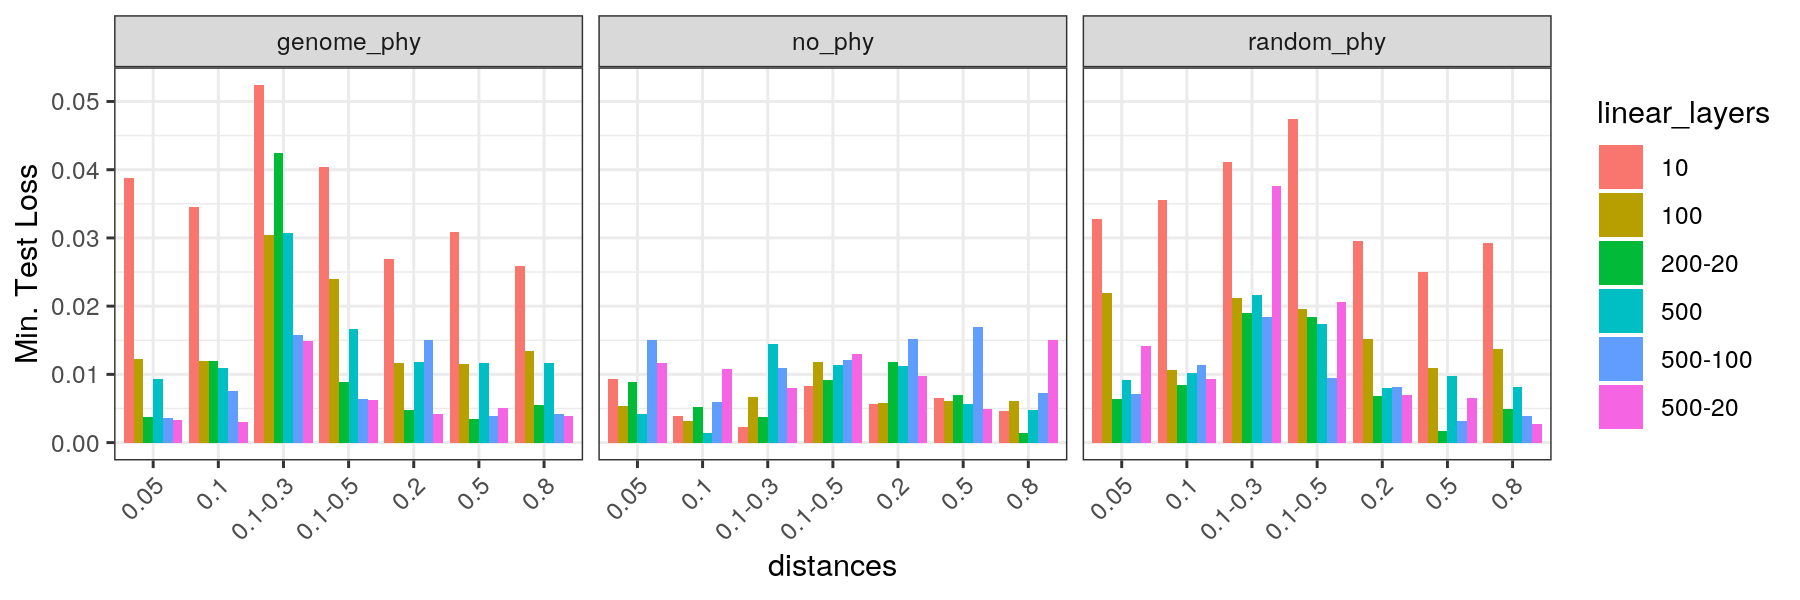

In [153]:
p = train_log_s %>%
    filter(batches == 50,
           learning_rate == 0.001,
           dropout_sparse == 0,
           dropout_linear == 0) %>%
    ggplot(aes(distances, min_test_loss, fill=linear_layers)) +
        geom_bar(stat='identity', position='dodge') +
        labs(y='Min. Test Loss') +
        facet_wrap(~ dataset) +
        theme_bw() +
        theme(
            axis.text.x = element_text(angle=45, hjust=1)
        )

p.dims(9,3)
plot(p)

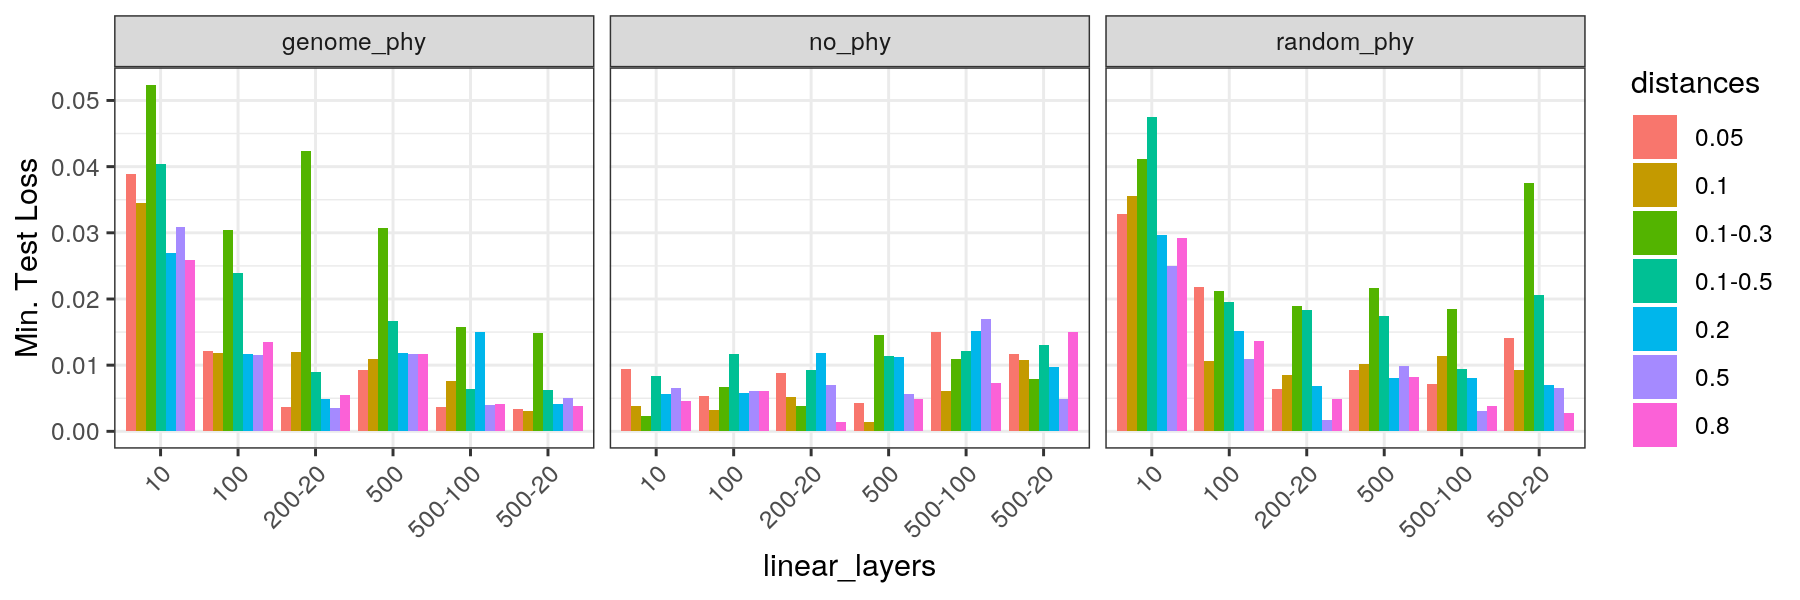

In [154]:
p = train_log_s %>%
    filter(batches == 50,
           learning_rate == 0.001,
           dropout_sparse == 0,
           dropout_linear == 0) %>%
    ggplot(aes(linear_layers, min_test_loss, fill=distances)) +
        geom_bar(stat='identity', position='dodge') +
        labs(y='Min. Test Loss') +
        facet_wrap(~ dataset) +
        theme_bw() +
        theme(
            axis.text.x = element_text(angle=45, hjust=1)
        )

p.dims(9,3)
plot(p)

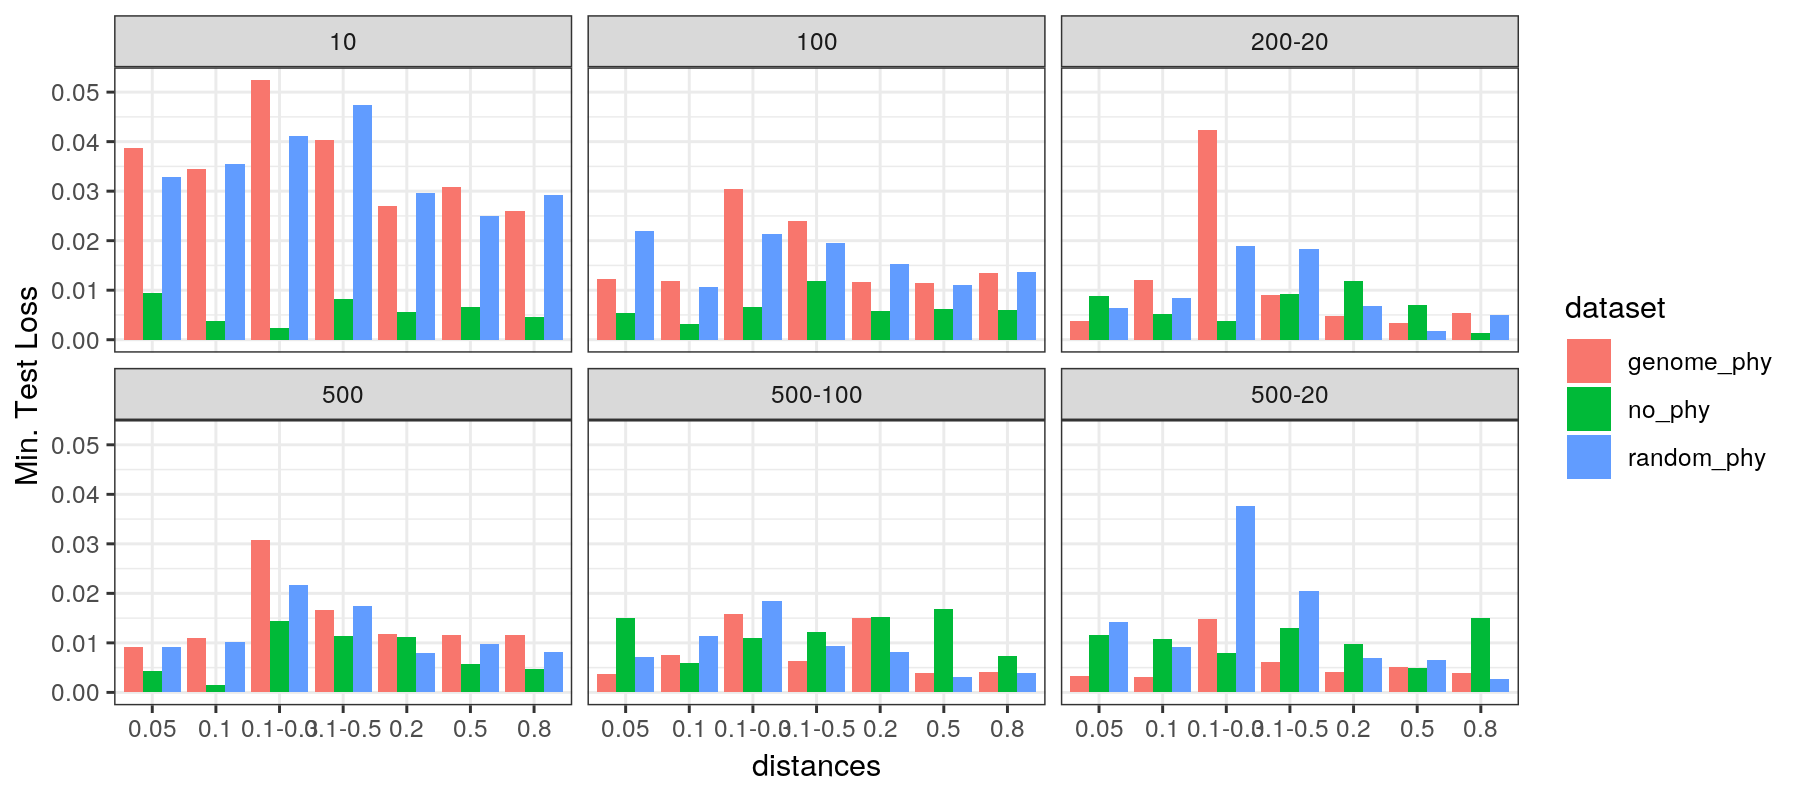

In [155]:
p = train_log_s %>%
    filter(batches == 50,
           learning_rate == 0.001,
           dropout_sparse == 0,
           dropout_linear == 0) %>%
    ggplot(aes(distances, min_test_loss, fill=dataset)) +
        geom_bar(stat='identity', position='dodge') +
        labs(y='Min. Test Loss') +
        facet_wrap(~ linear_layers) +
        theme_bw()

p.dims(9,4)
plot(p)

# TADA data augmentation